# CPSC 302: Assignment 3
## Nicholas Hu

### Exercise 1

#### (a)

The fixed points of $g$ can be found by solving $g(x) = x$:

\begin{align*}
x^2 + \tfrac{3}{16} & = x \\
16 x^2 - 16x + 3 &= 0 \\
16 x^2 - 12x - 4x + 3 &= 0 \\
4x(4x - 3) - 1(4x - 3) &= 0 \\
(4x - 1)(4x - 3) &= 0
\end{align*}

Hence the fixed points of $g$ are $x^*_1 = \tfrac{1}{4}$ and $x^*_2 = \tfrac{3}{4}$.

#### (b)

We consider the derivative $g'(x) = 2x$. When $x = \tfrac{1}{4}$, $\left| g'(x) \right| = \tfrac{1}{2} < 1$. Hence we expect fixed-point iteration to converge to $x^*_1$ in some neighbourhood of $x^*_1$. However, when $x = \tfrac{3}{4}$, $\left| g'(x) \right| = \tfrac{3}{2} > 1$. So fixed-point iteration will likely diverge near $x^*_2$.

#### (c)

The rate of convergence near a fixed point $x^*$ is given by $\text{rate} = -\log_{10} \rho$, where $\rho = \left| g'(x^*) \right|$. For the function in question, convergence is guaranteed only near $x^*_1 = \tfrac{1}{4}$, where $\text{rate} = -\log_{10} \tfrac{1}{2} \approx 0.3$. The number of iterations required to reduce the convergence error by an order of magnitude is roughly $\left\lceil \tfrac{1}{\text{rate}} \right\rceil \approx \left\lceil \tfrac{1}{0.3} \right\rceil = 4$.

### Exercise 2

In [1]:
#= 
CPSC 302 Assignment 3
Nicholas Hu
=#

using Plots
pyplot()
using LaTeXStrings

    
function print_correctdigits(approx, exact)
    isnan(exact) || @printf("%30d", floor(-log10(abs(approx - exact))))
    @printf("\n")
end


function newton(f, df, x_0; atol=1e-10, ftol=NaN, max_iter = Inf, verbose=false, exact_val=NaN)
    x_n = x_0
    iteration = 0

    if verbose
        @printf("%5s%15s", "k", "x_k")
        isnan(ftol) || @printf("%15s", "f(x_k)")
        isnan(exact_val) || @printf("%30s", "Correct digits in frac. part")
        @printf("\n%5d%15f", iteration, x_n)
        isnan(ftol) || @printf("%15.2f", f(x_n))
        print_correctdigits(x_n, exact_val)
    end

    while iteration <= max_iter
        x_prev = x_n
        x_n = x_n - f(x_n) / df(x_n)
        iteration += 1

        if verbose
            @printf("%5d%15f", iteration, x_n)
            isnan(ftol) || @printf("%15.2e", f(x_n))
            print_correctdigits(x_n, exact_val)
        end

        ((abs(x_n - x_prev) < atol) || (abs(f(x_n)) < ftol)) && break
    end

    @printf("\n")
    return x_n
end
    
    
F = a -> (x -> x^3 - a)
D = x -> 3x^2

newton(F(0), D, 1, ftol=1e-8, verbose=true)
newton(F(2), D, 1, ftol=1e-8, verbose=true)
newton(F(10), D, 2, ftol=1e-8, verbose=true)

    k            x_k         f(x_k)
    0       1.000000           1.00
    1       0.666667       2.96e-01
    2       0.444444       8.78e-02
    3       0.296296       2.60e-02
    4       0.197531       7.71e-03
    5       0.131687       2.28e-03
    6       0.087791       6.77e-04
    7       0.058528       2.00e-04
    8       0.039018       5.94e-05
    9       0.026012       1.76e-05
   10       0.017342       5.22e-06
   11       0.011561       1.55e-06
   12       0.007707       4.58e-07
   13       0.005138       1.36e-07
   14       0.003425       4.02e-08
   15       0.002284       1.19e-08
   16       0.001522       3.53e-09

    k            x_k         f(x_k)
    0       1.000000          -1.00
    1       1.333333       3.70e-01
    2       1.263889       1.90e-02
    3       1.259933       5.93e-05
    4       1.259921       5.85e-10

    k            x_k         f(x_k)
    0       2.000000          -2.00
    1       2.166667       1.71e-01
    2       2.154504      

2.154434690031884

For $a = 2$ and $a = 10$, we have the typical quadratic convergence of Newton's method. However, when $a = 0$, $f$ has a multiple root (of multiplicity 3) at $x = 0$. Hence Newton's method only converges linearly, with $\text{rate} = -\log_{10} \frac{3-1}{3} \approx 0.176$. In other words, it takes roughly $\left\lceil \tfrac{1}{0.176} \right\rceil = 6$ iterations for the error to decrease by an order of magnitude. Since in this case, the root is $x^* = 0$, the $x_k$ column of the output equals the error itself. Indeed, starting from an initial guess of $x_0 = 1$, we reach $x_k \leq 0.1$ when $k = 6$ and $x_k \leq 0.01$ when $k = 12$.

### Exercise 3

#### (a)

Let $f(x) = x + \ln x$. We have $f(1) = 1 + \ln 1 = 1 > 0$ and $f\left( \tfrac{1}{e} \right) = \tfrac{1}{e} + (-1) < \tfrac{1}{2} - 1 < 0$. Hence by the Intermediate Value Theorem, $f$ must have a root $x^* \in \left( \tfrac{1}{e}, 1 \right) \subset (0, \infty)$. Since $f'(x) = 1 + \tfrac{1}{x} > 0$ for $x > 0$, $f$ is strictly increasing and therefore the root is unique.

#### (b)


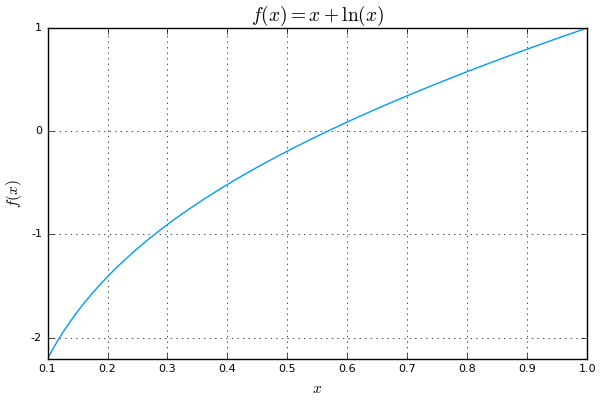

In [2]:
plot(x -> x + log(x), 0.1, 1; legend=false)
title!(L"f(x) = x + \ln(x)")
xlabel!(L"x")
ylabel!(L"f(x)")
xticks!(0.1:0.1:1)

#### (c)

The interval $I = [0.5, 0.6]$ is valid for the bisection method as $f(0.5) \cdot f(0.6) \approx -0.017 < 0$, i.e., there is a root in $I$. By **(a)**, there is *only one* root in $I$, so the method will converge to it.

We will apply fixed-point iteration to $g(x) = e^{-x}$, since $e^{-x} = x \Longleftrightarrow x + \ln x = 0$. Consider the same interval $I$ as above. Clearly $g$ is continuous on $I$; moreover, $g(0.5) \approx 0.61 \geq 0.5$, $g(0.6) \approx 0.55 \leq 0.6$, and $\forall x \in I \left| g'(x) \right| = g(x) \leq g(0.5) < 1$. Hence by the fixed point theorem, $g$ has a unique fixed point on $I$, to which the iteration is guaranteed to converge. 

In [3]:
function bisection(f, a, b; atol=1e-10, max_iter = Inf, verbose=false, exact_val=NaN)
    # Assume that a < b and f(a) * f(b) < 0 initially

    p = NaN
    iteration = 0

    if verbose
        @printf("%5s%15s", "k", "x_k")
        isnan(exact_val) || @printf("%30s", "Correct digits in frac. part")
        @printf("\n")
    end

    while iteration <= max_iter
        p_prev = p
        p = (a + b) / 2
        fp = f(p)
        fafp = f(a) * f(p)
        iteration += 1

        if verbose
            @printf("%5d%15f", iteration, p)
            print_correctdigits(p, exact_val)
        end

        (abs(p - p_prev) < atol || fafp == 0) && break

        fafp < 0 ? b = p : a = p
    end

    @printf("\n")
    return p
end


function fixedpoint(f, x_0; atol=1e-10, max_iter = Inf, verbose=false, exact_val=NaN)
    x_n = x_0
    iteration = 0

    if verbose
        @printf("%5s%15s", "k", "x_k")
        isnan(exact_val) || @printf("%30s", "Correct digits in frac. part")
        @printf("\n%5d%15f", iteration, x_n)
        print_correctdigits(x_n, exact_val)
    end

    while iteration <= max_iter
        x_prev = x_n
        x_n = f(x_n)
        iteration += 1

        if verbose
            @printf("%5d%15f", iteration, x_n)
            print_correctdigits(x_n, exact_val)
        end

        (abs(x_n - x_prev) < atol) && break
    end

    @printf("\n")
    return x_n
end


function secant(f, x_0, x_1; atol=1e-10, max_iter = Inf, verbose=false, exact_val=NaN)
    x_prev, x_n = x_0, x_1
    iteration = 1

    if verbose
        @printf("%5s%15s", "k", "x_k")
        isnan(exact_val) || @printf("%30s", "Correct digits in frac. part")
        @printf("\n%5d%15f", 0, x_0)
        print_correctdigits(x_0, exact_val)
        @printf("%5d%15f", 1, x_1)
        print_correctdigits(x_1, exact_val)
    end

    while iteration <= max_iter
        x_prev2 = x_prev
        x_prev = x_n
        x_n = x_prev - (f(x_prev) * (x_prev - x_prev2)) / (f(x_prev) - f(x_prev2))
        iteration += 1

        if verbose
            @printf("%5d%15f", iteration, x_n)
            print_correctdigits(x_n, exact_val)
        end

        (abs(x_n - x_prev) < atol) && break
    end

    @printf("\n")
    return x_n
end

    
# Root of x + ln(x), computed by WolframAlpha (for comparison purposes):
EXACT_ROOT = 0.5671432904097838729999686622103555497538

f = x -> x + log(x)
df = x -> 1 + 1/x
g = x-> exp(-x)

@printf("Bisection method result: x = %.15f\n\n\n", 
        bisection(f, 0.5, 0.6, verbose=true, exact_val=EXACT_ROOT))
@printf("Fixed point method result: x = %.15f\n\n\n", 
        fixedpoint(g, 0.5, verbose=true, exact_val=EXACT_ROOT))
@printf("Newton's method result: x = %.15f\n\n\n", 
        newton(f, df, 0.5, verbose=true, exact_val=EXACT_ROOT))
@printf("Secant method result: x = %.15f\n\n\n", 
        secant(f, 0.5, 0.6, verbose=true, exact_val=EXACT_ROOT))

    k            x_k  Correct digits in frac. part
    1       0.550000                             1
    2       0.575000                             2
    3       0.562500                             2
    4       0.568750                             2
    5       0.565625                             2
    6       0.567187                             4
    7       0.566406                             3
    8       0.566797                             3
    9       0.566992                             3
   10       0.567090                             4
   11       0.567139                             5
   12       0.567163                             4
   13       0.567151                             5
   14       0.567145                             5
   15       0.567142                             5
   16       0.567143                             7
   17       0.567144                             6
   18       0.567144                             6
   19       0.567143           

Newton's method converges *quadratically*, and thus requires the least number of iterations. The secant method converges *superlinearly* (but not quadratically), and takes a couple more iterations than Newton's method. The bisection and fixed-point methods converge *linearly*, and are therefore the slowest among the four methods.

Numerically speaking, for the methods exhibiting *linear* convergence, we expect that the number of iterations taken to gain a correct digit should remain constant. This is clearly seen in the fixed-point iteration (4 iterations per digit), and roughly seen with the bisection method (though the error in the bisection method does not decrease monotonically, owing to the bisection process). In other words, the number of correct digits grows linearly. Similarly, Newton's method, which converges *quadratically*, exhibits quadratic growth in the number of correct digits as $k$ increases and quickly reaches machine precision.

### Exercise 4

#### (a)

*Newton's method* should be used: as $f$ is linear, its 'tangent line approximation' at any point is the function itself, so Newton's method will converge to the exact solution on its first iteration. The secant method, though equally accurate, would make superfluous function evaluations. The bisection method is a poor choice, as several bisections will be required to approach the root.

#### (b)

The *bisection method* should be used: as the function is not smooth (in fact, it is not even differentiable at several points), Newton's and the secant method will perform poorly. In contrast, the bisection method is unaffected by the jaggedness of the function.

#### (c)

The *secant method* should be used: as the function is smooth and varies slowly (has bounded derivatives), Newton's and the secant method are good candidates. However, since the actual derivative is difficult to find and/or costly to compute, we must resort to using the latter.